# **<center><span style="color:black">COORPORACIÓN UNIVERSITARIA MINUTO DE DIOS - UNIMINUTO</span></center>**
# <center><span style="color:black">ESPECIALIZACIÓN EN HERRAMIENTAS PARA LA GESTIÓN DE DATOS</span></center>
**<center>INTEGRANTES**

<center>GUSTAVO ANDRES DIAZ PRIETO (000792780)</center>
<center>ANGELO RIOS RAMIREZ (000544544)</center>


## <center> Análisis de la información demográfica de los colombianos en el exterior utilizando big data y la metodología CRISP-DM: un estudio de caso </center>

## Datos:

Para el estudio se toma una base datos de datos abiertos de Información demográfica Colombianos en el exterior - Nivel de Estudio y Grupo Edad, la cual contiene Información de la población colombiana residente y registrada en las diferentes misiones consulares en el exterior que incluye el género, la edad, el nivel de estudios, la ocupación, lugar de residencia, el consulado de la circunscripción que lo atiende, entre otros.

Base de datos actualizada a mayo de 2023

In [1]:
#Definicion de librerior e importacion de base de datos completa para trabajar
import pandas as pd

# desactivar los warning
import warnings
warnings.filterwarnings('ignore')

##importar datos
df = pd.read_csv('Colombianos_registrados_en_el_exterior.csv')
df.dtypes

País                     object
Código ISO país          object
Oficina de registro      object
Grupo edad               object
Edad (años)               int64
Área Conocimiento        object
Sub Area Conocimiento    object
Nivel Académico          object
Estado civil             object
Género                   object
Etnia de la persona      object
Estatura (CM)             int64
Localización             object
Cantidad de personas      int64
dtype: object

## Limpieza de datos

Para realiza la limpieza de datos se deben generar frecuencias para encontrar datos atípicos y suprimir aquellas filas que no puedan proporcionar un valor análisis

In [2]:
# Se inicia con un renombramiento de columnas para que su codificación y manipulación sea más eficiente.
df = df.rename(columns={'País': 'Pais', 'Código ISO país': 'Cod_pais', 'Edad (años)': 'Edad', 'Género': 'Genero',
                        'Cantidad de personas': 'Cant_personas','Nivel Académico':'Nivel_educativo','Grupo edad':'Grupo_edad',
                        'Estado civil': 'Estado_civil','Etnia de la persona':'Etnia_persona','Estatura (CM)':'Estatura'})
df.head()

Pais Cod_pais Oficina de registro Grupo_edad  Edad  \
0   ESPAÑA      ESP     C. VALENCIA ESP     ADULTO    42   
1   ESPAÑA      ESP          C. SEVILLA     ADULTO    52   
2   ESPAÑA      ESP           C. MADRID     ADULTO    43   
3   ESPAÑA      ESP           C. BILBAO     ADULTO    37   
4  BELGICA      BEL         C. BRUSELAS     ADULTO    34   

                              Área Conocimiento Sub Area Conocimiento  \
0  ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES    CONTADURÍA PÚBLICA   
1                                       NINGUNA               NINGUNA   
2                                     NO INDICA             NO INDICA   
3  ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES        ADMINISTRACIÓN   
4                                  BELLAS ARTES                MÚSICA   

  Nivel_educativo Estado_civil     Genero         Etnia_persona  Estatura  \
0       NO INDICA       CASADO  MASCULINO               NINGUNA        -1   
1       NO INDICA  DESCONOCIDO   FEMENINO  SIN ETNIA REGISTRADA       152   
2        PRIMARIA      SOLTERO  MASCULINO  SIN ETNIA REGISTRADA       172   
3       NO INDICA  DESCONOCIDO  MASCULINO                  OTRO        -1   
4       NO INDICA  DESCONOCIDO  MASCULINO                  OTRO        -1   

            Localización  Cant_personas  
0  (40.463667, -3.74922)              1  
1  (40.463667, -3.74922)              3  
2  (40.463667, -3.74922)              1  
3  (40.463667, -3.74922)              2  
4  (50.503887, 4.469936)              1

In [3]:
# Revisamos las variables numericas para determinar valores maximos y minimos
df.describe()

Edad       Estatura  Cant_personas
count  721677.000000  721677.000000  721677.000000
mean       45.196733      79.228647       1.803643
std        16.200684     276.768978       4.960423
min        -1.000000      -1.000000       1.000000
25%        34.000000      -1.000000       1.000000
50%        43.000000      -1.000000       1.000000
75%        56.000000     165.000000       1.000000
max       139.000000  163163.000000     391.000000

In [4]:
# Se eliminan filas de los datos con edad = -1 ya que es una variable que se tendra en cuenta para el modelo
df.drop(df[(df['Edad'] == -1)].index, inplace=True)
df.describe()

Edad      Estatura  Cant_personas
count  720797.000000  720797.00000  720797.000000
mean       45.253134      79.26993       1.799978
std        16.129907     276.92317       4.863003
min         0.000000      -1.00000       1.000000
25%        34.000000      -1.00000       1.000000
50%        43.000000      -1.00000       1.000000
75%        56.000000     165.00000       1.000000
max       139.000000  163163.00000     308.000000

In [5]:
# Se realiza frecuencia por variable Nivel educativo para determinar posibles valores erroneos o no especificados
df['Nivel_educativo'].value_counts().sort_values(ascending = False)

NO INDICA                         329435
BACHILLERATO                      131386
PREGRADO - PROFESIONAL             97813
PRIMARIA                           55688
PREGRADO - TÉCNICO PROFESIONAL     34266
POSTGRADO - MAESTRIA               22362
PREGRADO - TECNOLÓGICO             17536
POSTGRADO - ESPECIALIZACIÓN        13891
NINGUNO                            12228
POSTGRADO - DOCTORADO               5419
(NO REGISTRA)                        714
SIN PROFESIÓN                         59
Name: Nivel_educativo, dtype: int64

In [6]:
# Se eliminan filas cuyo Nivel Educativo sea igual No Registra ya que no es una categoria que sirva para el analisis posterior
df.drop(df[(df['Nivel_educativo'] == '(NO REGISTRA)')].index, inplace=True)

In [7]:
# Se realiza frecuencia por variable Estado Civil para determinar posibles valores erroneos o no especificados
df['Estado_civil'].value_counts().sort_values(ascending = False)

SOLTERO                 264926
CASADO                  207272
DESCONOCIDO             149332
UNION_LIBRE              47095
DIVORCIADO               37554
VIUDO                    13138
SEPARADO_MATRIMONIO        516
SEPARADO_UNION_LIBRE       250
Name: Estado_civil, dtype: int64

In [8]:
# Se eliminan filas cuyo Estado civil sea igual a desconocido ya que no es una categoria que sirva para el analisis posterior
df.drop(df[(df['Estado_civil'] == 'DESCONOCIDO')].index, inplace=True)

In [9]:
# Se realiza frecuencia por variable Genero para determinar posibles valores erroneos o no especificados
df['Genero'].value_counts().sort_values(ascending = False)

FEMENINO       315368
MASCULINO      254522
DESCONOCIDO       861
Name: Genero, dtype: int64

In [10]:
# Se eliminan filas cuyo Genero sea igual a desconocido ya que no es una categoria que sirva para el analisis posterior
df.drop(df[(df['Genero'] == 'DESCONOCIDO')].index, inplace=True)

## Analisis:

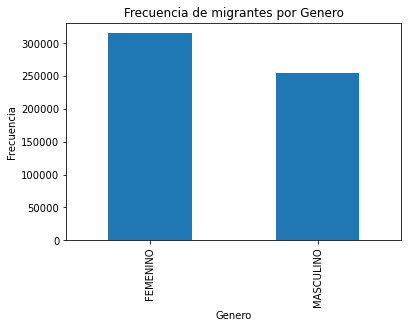

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Genero = df['Genero'].value_counts().nlargest()

Genero.plot(kind='bar')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de migrantes por Genero')
plt.show()

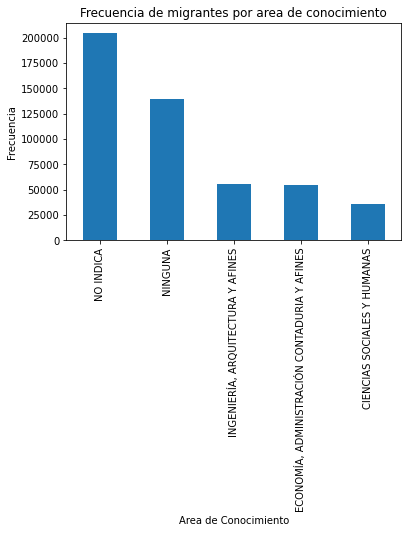

In [12]:
Area_conocimiento = df['Área Conocimiento'].value_counts().nlargest()

Area_conocimiento.plot(kind='bar')
plt.xlabel('Area de Conocimiento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de migrantes por area de conocimiento')
plt.show()

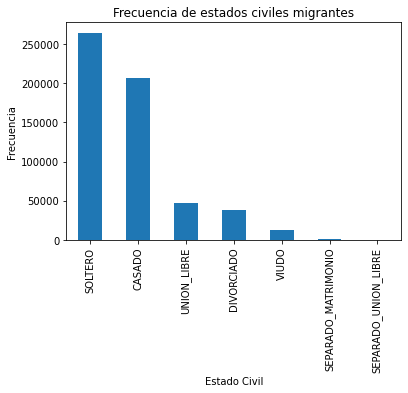

In [13]:
Estado_civil = df['Estado_civil'].value_counts().nlargest(10)

Estado_civil.plot(kind='bar')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de estados civiles migrantes')
plt.show()

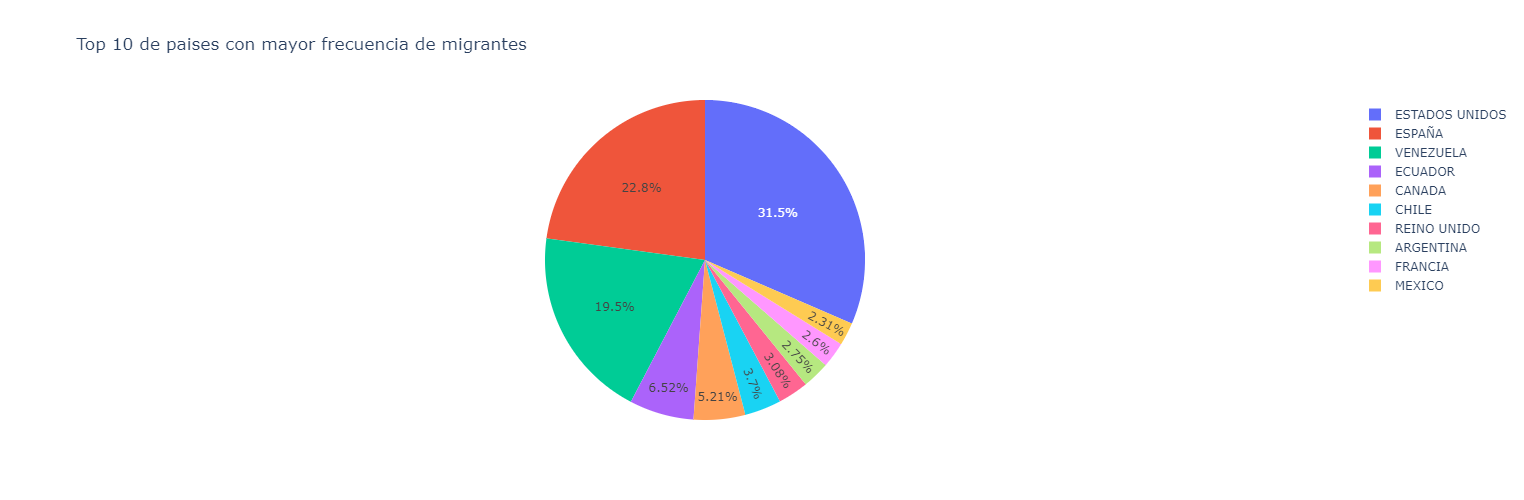

In [14]:
import plotly.graph_objs as go
import plotly.offline as offline

top_10 = df['Pais'].value_counts().nlargest(10)
data = [go.Pie(labels=top_10.index, values=top_10.values, hoverinfo='label+value')]

layout = go.Layout(
    autosize=False,
    width=500,  # Anchura del gráfico en píxeles
    height=500,  # Altura del gráfico en píxeles
    title = 'Top 10 de paises con mayor frecuencia de migrantes'
)

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig, filename='active_Category')

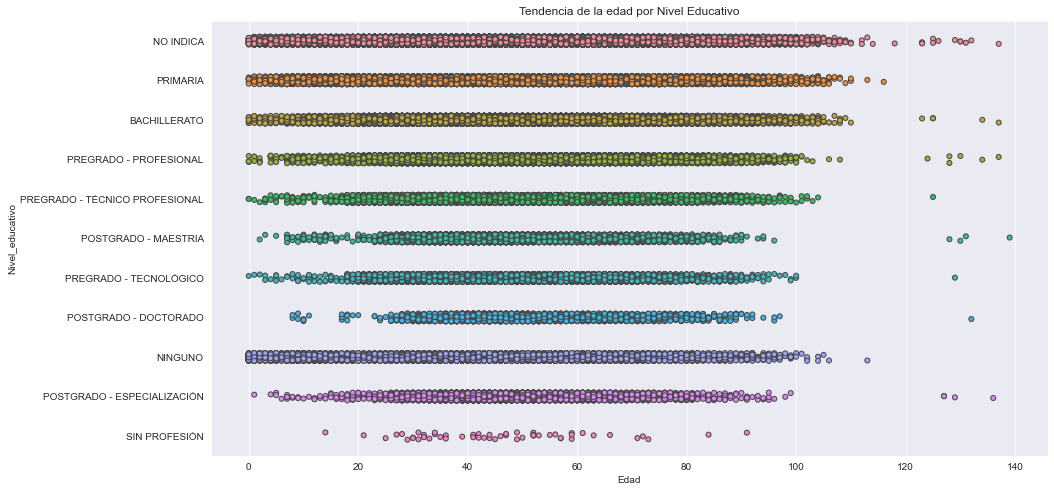

In [15]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
p = sns.stripplot( x= 'Edad', 
                   y= 'Nivel_educativo',
                   data = df, 
                   jitter = True, 
                   linewidth = 1)
title = ax.set_title('Tendencia de la edad por Nivel Educativo')

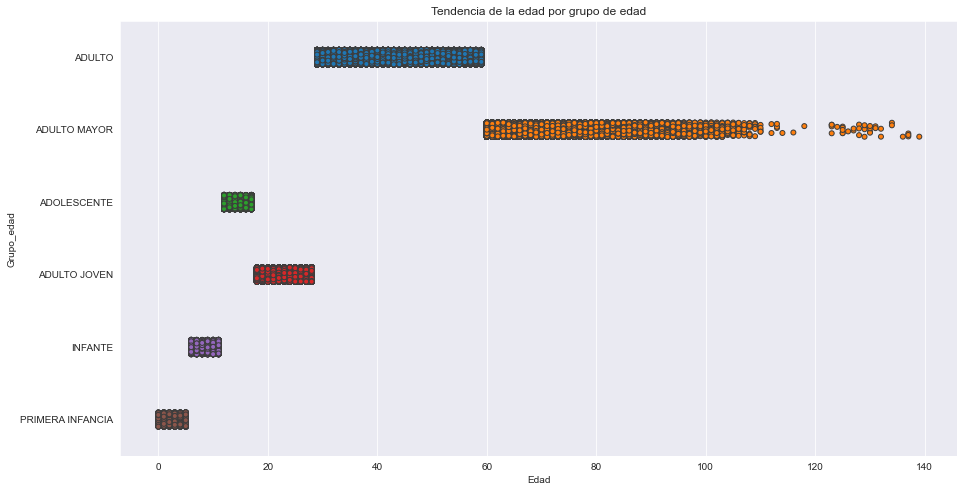

In [16]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
p = sns.stripplot( x= 'Edad', 
                   y= 'Grupo_edad',
                   data = df, 
                   jitter = True, 
                   linewidth = 1)
title = ax.set_title('Tendencia de la edad por grupo de edad')

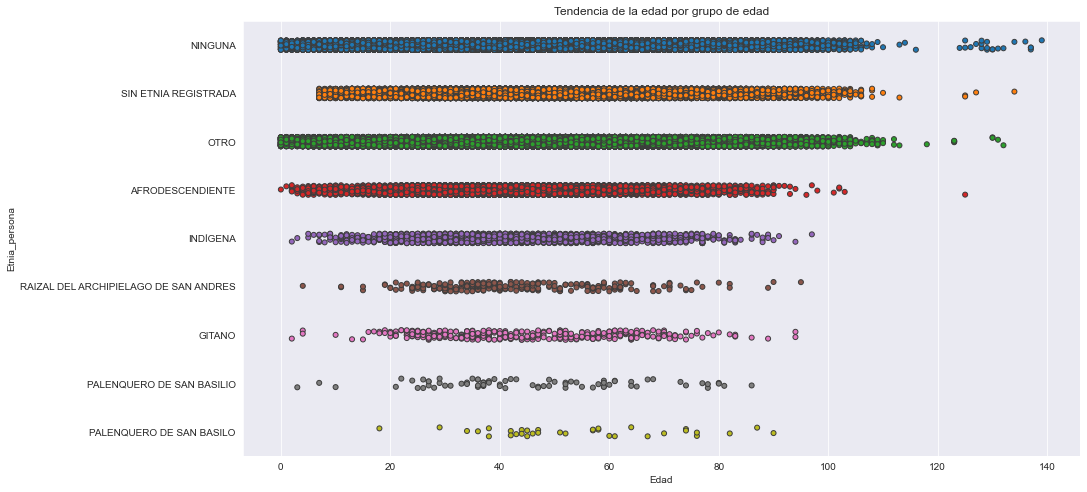

In [17]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
p = sns.stripplot( x= 'Edad', 
                   y= 'Etnia_persona',
                   data = df, 
                   jitter = True, 
                   linewidth = 1)
title = ax.set_title('Tendencia de la edad por grupo de edad')

# Regresión logística Prueba 1

Para realizar la regresión logística primero debemos realizar una copia del dataframe original para posteriormente escoger las variables que se van utilizar para el modelo, posteriormente se realiza un tratamiento de datos que consiste en convertir variables categóricas a numéricas para implementarlas en el modelo de la siguiente forma:

•	Se determina que se tomara como base que los países de Estados Unidos y España tendrán el valor de 1 y el resto de los países tendrán el valor de 0, esto con la finalidad de convertir esta variable en binaria.

•	Para la variable de nivel académico se determina que el valor 1 es que indica algún tipo de estudio y 0 que no indico el estudio o no aplica, esto con la finalidad de convertir esta variable en binaria.

•	Para la variable genero se determina que el valor 1 se asigna a los registros que tienen el valor masculino y 0 para los registros que tienen el valor femenino 

•	Por otra parte la variable de estado civil se convertirán en variables dummy para posteriormente tenerlas en cuenta en el modelo de regresión logística. 


In [18]:
# funcion para la transformacion de variables categoricas en variables numericas y elimina variable

def create_cambiar(df, var_name):
    cambio = pd.get_dummies(df[var_name], prefix = var_name)
    df = df.drop([var_name],axis = 1).astype(int)
    df = pd.concat([df,cambio],axis = 1)
    return df

In [19]:
# Creamos un nuevo dataframe para convertir las variables cotegorias en numericas
df_final = df[["Pais","Edad","Nivel_educativo","Estado_civil","Genero","Etnia_persona"]]
df_final.shape

(569890, 6)

In [20]:
# Se convierte variable genero Masculino = 1 y Femenino = 0
df_final['Genero'] = df_final['Genero'].apply(lambda x: x.replace('MASCULINO','1') if x == 'MASCULINO' else x.replace('FEMENINO','0'))

# Se convierte varaible pais Estados Unidos y España = 1 y los demas en 0
df_final['Pais'] = df_final['Pais'].apply(lambda x: x.replace('ESTADOS UNIDOS','1') if x == 'ESTADOS UNIDOS' else x)
df_final['Pais'] = df_final['Pais'].apply(lambda x: x.replace('ESPAÑA','1') if x == 'ESPAÑA' else x)
df_final['Pais'] = np.where(df_final['Pais'] != '1','0','1')
df_final['Pais'] = df_final['Pais'].astype(int)

df_final.head()

Pais  Edad Nivel_educativo Estado_civil Genero         Etnia_persona
0      1    42       NO INDICA       CASADO      1               NINGUNA
2      1    43        PRIMARIA      SOLTERO      1  SIN ETNIA REGISTRADA
5      0    79        PRIMARIA      SOLTERO      1               NINGUNA
6      1    56    BACHILLERATO       CASADO      0  SIN ETNIA REGISTRADA
10     0    67    BACHILLERATO       CASADO      0                  OTRO

In [21]:
df_final['Nivel_educativo'].value_counts().nlargest()

NO INDICA                         199238
BACHILLERATO                      124933
PREGRADO - PROFESIONAL             92644
PRIMARIA                           53464
PREGRADO - TÉCNICO PROFESIONAL     32469
Name: Nivel_educativo, dtype: int64

In [22]:
# Se convierte varaible Nivel educativo donde 1 especifico algun estudio y 0 donde no aplica o no indica estudio

df_final['Nivel_educativo'] = df_final['Nivel_educativo'].apply(lambda x: x.replace('NO INDICA','0') if x == 'NO INDICA' else x)
df_final['Nivel_educativo']= np.where(df_final['Nivel_educativo'] != '0','1','0')
df_final['Nivel_educativo'] = df_final['Nivel_educativo'].astype(int)

df_final.head()

Pais  Edad  Nivel_educativo Estado_civil Genero         Etnia_persona
0      1    42                0       CASADO      1               NINGUNA
2      1    43                1      SOLTERO      1  SIN ETNIA REGISTRADA
5      0    79                1      SOLTERO      1               NINGUNA
6      1    56                1       CASADO      0  SIN ETNIA REGISTRADA
10     0    67                1       CASADO      0                  OTRO

In [23]:
# Se convierte varaible Nivel educativo donde 1 especifico algun estudio y 0 donde no aplica o no indica estudio

df_final['Etnia_persona'] = df_final['Etnia_persona'].apply(lambda x: x.replace('NINGUNA','0') if x == 'NINGUNA' else x)
df_final['Etnia_persona']= np.where(df_final['Etnia_persona'] != '0','1','0')
df_final['Etnia_persona'] = df_final['Etnia_persona'].astype(int)

df_final.head()

Pais  Edad  Nivel_educativo Estado_civil Genero  Etnia_persona
0      1    42                0       CASADO      1              0
2      1    43                1      SOLTERO      1              1
5      0    79                1      SOLTERO      1              0
6      1    56                1       CASADO      0              1
10     0    67                1       CASADO      0              1

In [24]:
df_final['Etnia_persona'].value_counts().nlargest()

0    317335
1    252555
Name: Etnia_persona, dtype: int64

In [25]:
df_final['Estado_civil'].value_counts().nlargest()

SOLTERO        264537
CASADO         206866
UNION_LIBRE     47063
DIVORCIADO      37531
VIUDO           13127
Name: Estado_civil, dtype: int64

In [26]:
df_final = create_cambiar(df_final,'Estado_civil')
df_final.head()

Pais  Edad  Nivel_educativo  Genero  Etnia_persona  Estado_civil_CASADO  \
0      1    42                0       1              0                    1   
2      1    43                1       1              1                    0   
5      0    79                1       1              0                    0   
6      1    56                1       0              1                    1   
10     0    67                1       0              1                    1   

    Estado_civil_DIVORCIADO  Estado_civil_SEPARADO_MATRIMONIO  \
0                         0                                 0   
2                         0                                 0   
5                         0                                 0   
6                         0                                 0   
10                        0                                 0   

    Estado_civil_SEPARADO_UNION_LIBRE  Estado_civil_SOLTERO  \
0                                   0                     0   
2                                   0                     1   
5                                   0                     1   
6                                   0                     0   
10                                  0                     0   

    Estado_civil_UNION_LIBRE  Estado_civil_VIUDO  
0                          0                   0  
2                          0                   0  
5                          0                   0  
6                          0                   0  
10                         0                   0

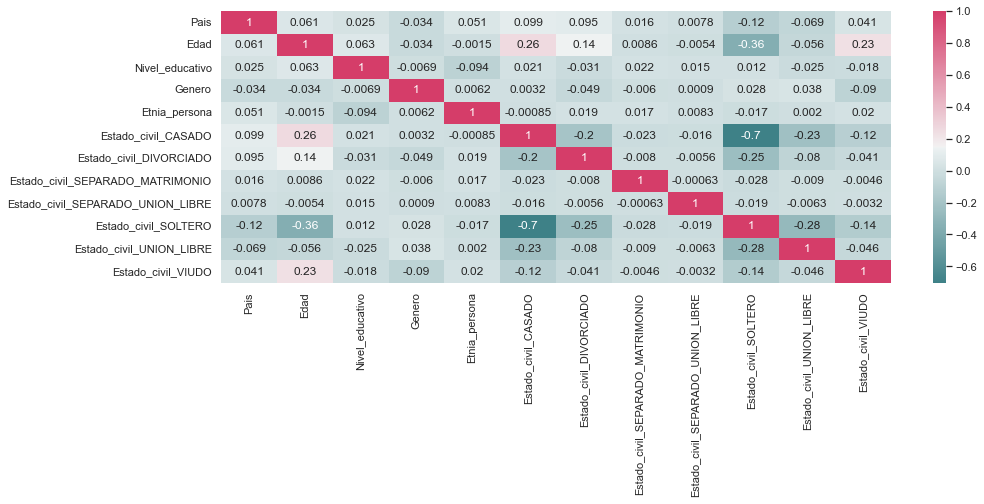

In [27]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(15,5)})
color = sns.color_palette()
corrmat = df_final.corr(method = 'pearson')
p = sns.heatmap(corrmat, annot = True, cmap = sns.diverging_palette(202,0,as_cmap = True))

[Text(0.5, 0, 'Edad'), Text(0, 0.5, 'Pais')]

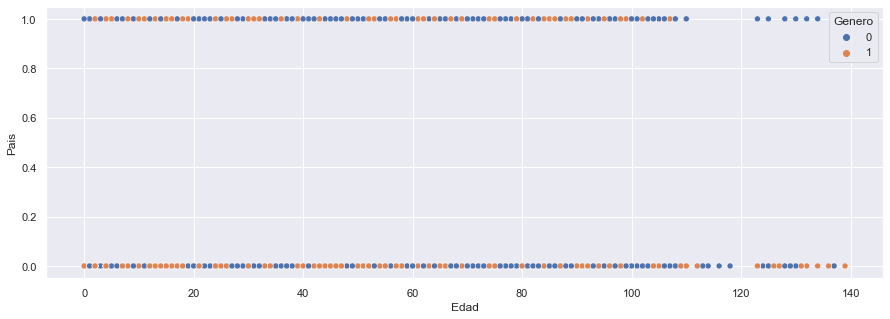

In [28]:
grafico=sns.scatterplot(data=df_final,x="Edad",y="Pais",hue="Genero")
grafico.set(xlabel="Edad", ylabel="Pais")

In [29]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df

# Obtén el nombre de todas las columnas del DataFrame
columnas = df_final.columns

# Itera sobre cada columna y conviértela a tipo int
for columna in columnas:
    df_final[columna] = df_final[columna].astype(int)

In [30]:
df_final.dtypes

Pais                                 int32
Edad                                 int32
Nivel_educativo                      int32
Genero                               int32
Etnia_persona                        int32
Estado_civil_CASADO                  int32
Estado_civil_DIVORCIADO              int32
Estado_civil_SEPARADO_MATRIMONIO     int32
Estado_civil_SEPARADO_UNION_LIBRE    int32
Estado_civil_SOLTERO                 int32
Estado_civil_UNION_LIBRE             int32
Estado_civil_VIUDO                   int32
dtype: object

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #libreria para ajustar el modelo

#X=df_final[["Nivel_educativo","Edad","Genero","Etnia_persona",
#            "Estado_civil_CASADO","Estado_civil_DIVORCIADO","Estado_civil_SEPARADO_MATRIMONIO","Estado_civil_SEPARADO_UNION_LIBRE","Estado_civil_SOLTERO","Estado_civil_UNION_LIBRE"]]
X=df_final[["Nivel_educativo","Genero","Etnia_persona"]]


X=np.array(X)
X=sm.add_constant(X)

In [32]:
Y=np.array(df_final[["Pais"]])

In [33]:
ajuste=sm.Logit(Y,X) #Funcion para regresion logica
ajuste=ajuste.fit()
print(ajuste.summary())

Optimization terminated successfully.
         Current function value: 0.686567
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               569890
Model:                          Logit   Df Residuals:                   569886
Method:                           MLE   Df Model:                            3
Date:                Sat, 20 May 2023   Pseudo R-squ.:                0.003382
Time:                        17:52:35   Log-Likelihood:            -3.9127e+05
converged:                       True   LL-Null:                   -3.9260e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3038      0.006    -52.275      0.000      -0.315      -0.292
x1             0.1255      0.

# Regresión logística Prueba 2

Para realizar la regresión logística primero debemos realizar una copia del dataframe original para posteriormente escoger las variables que se van utilizar para el modelo, posteriormente se realiza un tratamiento de datos que consiste en convertir variables categóricas a numéricas para implementarlas en el modelo de la siguiente forma:

•	Se determina que se tomara como base solo los países de Estados Unidos y España los cuales segun sus frecuencias solo los de mayor tendencia

    valor de 1 Corresponde a Estados Unidos
    Valor de 0 corresponde a España
    
•	Para la variable de nivel académico se escogen los valores de bachillerato y pregrado profesion:

    valor de 1 Corresponde a bachillerato
    Valor de 0 corresponde a pregrado profesion

•	Para la variable genero se determina que el valor 1 se asigna a los registros que tienen el valor masculino y 0 para los registros que tienen el valor femenino 

•	Por otra parte la variable de estado civil se convertirán en variables dummy para posteriormente tenerlas en cuenta en el modelo de regresión logística. 

In [34]:
dt_rl = df[((df['Pais'] == 'ESTADOS UNIDOS') | (df['Pais'] == 'ESPAÑA')) & (df['Edad'] < 100)]

In [35]:
dt_rl = dt_rl[((dt_rl['Nivel_educativo'] == 'BACHILLERATO') | (dt_rl['Nivel_educativo'] == 'PREGRADO - PROFESIONAL'))]

In [36]:
dt_rl = dt_rl[["Pais","Nivel_educativo","Genero","Edad","Cant_personas"]]

# 1. Estados Unidos, 2. España
dt_rl['Pais'] = dt_rl['Pais'].apply(lambda x:1 if x == "ESTADOS UNIDOS" else 0)

# 1. Bachillerato 2. Pregrado - profesional
dt_rl['Nivel_educativo'] = dt_rl['Nivel_educativo'].apply(lambda x:1 if x == "BACHILLERATO" else 0)

# Se convierte variable genero Masculino = 1 y Femenino = 0
dt_rl['Genero'] = dt_rl['Genero'].apply(lambda x: x.replace('MASCULINO','1') if x == 'MASCULINO' else x.replace('FEMENINO','0'))

dt_rl.head()

Pais  Nivel_educativo Genero  Edad  Cant_personas
6      1                1      0    56              1
16     1                1      1    62              1
21     1                1      1    17              2
33     1                1      0    47              1
37     0                1      0    32              1

[Text(0.5, 0, 'Edad'), Text(0, 0.5, 'Pais')]

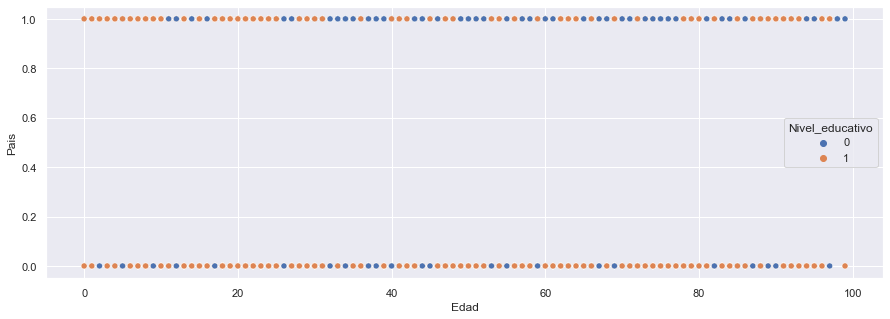

In [37]:
grafico=sns.scatterplot(data=dt_rl,x="Edad",y="Pais",hue="Nivel_educativo")
grafico.set(xlabel="Edad", ylabel="Pais")

In [38]:
dt_rl.corr(method='pearson')

Pais  Nivel_educativo      Edad  Cant_personas
Pais             1.000000        -0.290420  0.137609      -0.038001
Nivel_educativo -0.290420         1.000000  0.059682       0.144927
Edad             0.137609         0.059682  1.000000      -0.121815
Cant_personas   -0.038001         0.144927 -0.121815       1.000000

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #libreria para ajustar el modelo

X=dt_rl[["Nivel_educativo","Edad","Cant_personas"]]
X=np.array(X)
X=sm.add_constant(X)

Y=np.array(dt_rl[["Pais"]])

In [40]:
ajuste=sm.Logit(Y,X) #Funcion para regresion logica
ajuste=ajuste.fit()
print(ajuste.summary())

Optimization terminated successfully.
         Current function value: 0.627252
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               105845
Model:                          Logit   Df Residuals:                   105841
Method:                           MLE   Df Model:                            3
Date:                Sat, 20 May 2023   Pseudo R-squ.:                 0.08297
Time:                        17:52:42   Log-Likelihood:                -66391.
converged:                       True   LL-Null:                       -72399.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1115      0.023     -4.793      0.000      -0.157      -0.066
x1            -1.3269      0.